# **Sentiment Analysis on the IMDB movie reviews**

## **Context**

Movie reviews help users decide whether a movie is worth watching or not. A summary of the reviews for a movie can help a user make quick decisions within a small period of time, rather than spending much more time reading multiple reviews for a movie. Sentiment analysis helps in rating how positive or negative a movie review is. Therefore, the process of understanding if a review is positive or negative can be automated as the machine learns different techniques from the domain of Natural Language Processing.

## **Objective**

The dataset contains 10,000 movie reviews. The objective is to do Sentiment Analysis(positive/negative) for the movie reviews using Deep Learning Sequential model Long short term Memory (LSTM) different techniques and observe the accurate results.


## **Data Dictionary**
- **review:** reviews of the movies.
- **sentiment:** indicates the sentiment of the review 0 or 1( 0 is for negative review and 1 for positive review)        

## **Importing the libraries**

In [ ]:
# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the dataset**

In [ ]:
# Loading data into pandas dataframe
reviews = pd.read_csv("/content/drive/MyDrive/cleaned_reviews.csv")

In [ ]:
# Creating the copy of the data frame
data = reviews.copy()

## **Overview of the dataset**

**View the first and last 2 rows of the dataset**

In [ ]:
data.head(2)

,review,sentiment
0,okay know nt project india good light overall theme india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribly wrong interaction nandini father law power dysfunctional relationship life changed strength shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption life find heaving sigh relief sadness climax musical interlude strength believable well done,1
1,despite john travolta statement interview favorite role career cool prof disappointing sequel witty clever get shorty travolta delivers pleasant enough performance mildly entertaining ultimately fall flat due underdeveloped plot unlikeable character surprising lack chemistry lead travolta uma thurman although laugh unfunny dialog example appeared frequently trailer kind say thurman dance travolta hey brooklyn suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movie clever fish water idea cool seems biz entirely gone crooked since interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character think black often seen dressed pimp quite funny first scene introduces get tired embarrassing almost immediately afterward overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fan get shorty may actually wish avoid sequel devoid thing made one winner rate admittedly harsh,0


In [ ]:
data.tail(2)

,review,sentiment
9980,disappointed show hearing reading hoopla ground breaking show sort wild promise quality tried watch letdown acting way forced exaggerated story made little sense hint vaunted look teenager life could see paltry attempt much reality reality show wondering many negative comment show reason really good beating drum quality show serf attract attention poorly made,0
9981,featured man stand dumb dumb dumb inept comedy feature lousy effect make effect jaw amityville friday th part look better comparison mention asinine extreme one many movie feature pop screen effect steve guttenberg jeffrey tambor got trapped mess least kill career tambor would go star hbo larry sander show ron howard box office smash grinch stole christmas guttenberg followed flop police academy cocoon project instead man regret four,0


* Here, a sentiment value of **0 is negative**, and **1 represents a positive sentiment.**

### **Understand the shape of the dataset**

In [ ]:
# Print shape of data
data.shape               

(9982, 2)

### **Check the data types of the columns for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     9982 non-null   object
 1   sentiment  9982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.1+ KB


**Observations:**

* Data has 10000 rows and 2 columns.
* Both the columns are object type.
* There are no null values present in the dataset.

### **Checking for duplicate values**

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values present in the data since we are using the cleaned data from week 1.

## **Exploratory Data Analysis**

**Word Cloud for cleaned Negative Reviews**

In [ ]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['sentiment'] == 0]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['review']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()]) 

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud


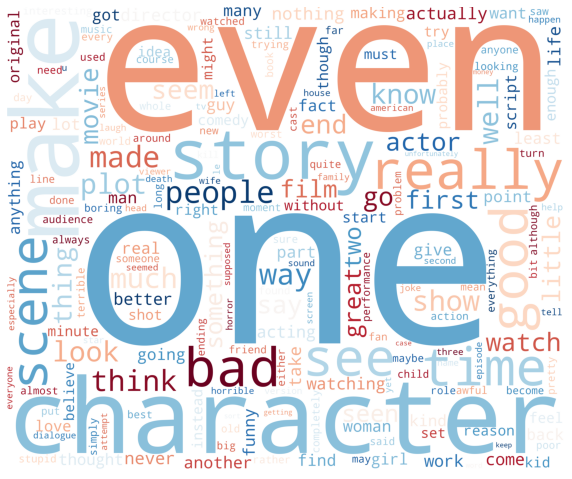

In [ ]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The **even, bad, never, little, least, maybe, instead, waste, still, boring** were some of the important recurring words observed in the negative reviews.

**Word Cloud for cleaned Positive Reviews**

In [ ]:
# Creating word cloud for positive reviews

positive_reviews = data[data['sentiment'] == 1]
# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(positive_reviews['review'])
# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud

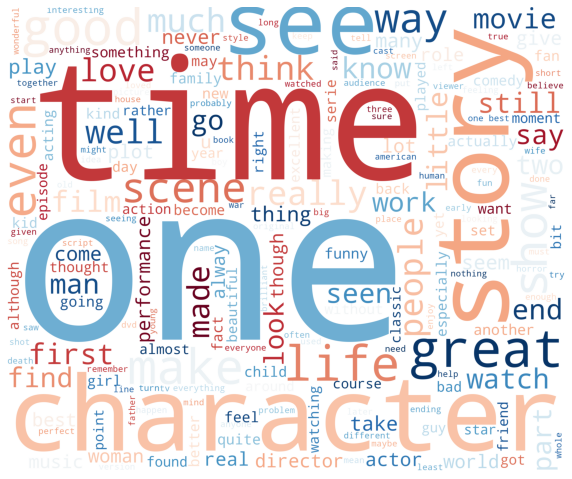

In [ ]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* ** Character,story, well, good, best, great, scene,enjoy, interesting, wonderful** were some of the important words observed in the positive reviews

In [ ]:
# check the count of each labels
data['sentiment'].value_counts()    

1    5033
0    4949
Name: sentiment, dtype: int64

We can observe that classes are balanced.

## **Sequential model - LSTM**

Sequential models is a common name for Neural Network architectures, that have units with memory. Here we shall be using LSTM, which is a type of Recurrent Neural Network layer as the memory units. 

A typical LSTM unit is made up of a cell, an input gate, an output gate, and a forget gate. The cell is responsible for "remembering" values over extended periods of time and "forgetting" certain values when the context changes. This allows LSTM to maintain "memory." Each of the three gates can be viewed as a Fully-Connected Artificial Neural Network, or Multi-Layer Perceptrons. They calculate an activation (using an activation function) of a weighted sum. Additionally, the input and output vectors are accompanied by a context vector that contains information about the summary of the text it has processed thus far.

Intuitively, the gates regulate the flow of values that pass through the connections of the LSTM, which is why they are referred to as "gates." They tend to output values between '1' and '0', where '1' is multiplied with the context and input vectors. The values that are multiplied with zero are forgotten and those multiplied with 1 are remembered.

**Components of the LSTM**

The LSTM cell contains the following components:

- Forget Gate “f” ( a neural network with sigmoid)
- Candidate layer “C"(a NN with Tanh)
- Input Gate “I” ( a NN with sigmoid )
- Output Gate “O”( a NN with sigmoid)
- Hidden state “H” ( a vector )
- Memory state “C” ( a vector)

Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)



**Working of gates in LSTM**

First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

Ct = Ct-1 * ft

Calculating the new memory state:

Ct = Ct + (It * C`t)

Now, we calculate the output:

Ht = tanh(Ct)

In [ ]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from keras.models import Sequential
import tensorflow
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

### **Tokenizing and converting the reviews into numerical vectors**

In [ ]:
# Creating the tokenizer with 700 vocab size
tokenizer = Tokenizer(num_words = 700, split = ' ') 

tokenizer.fit_on_texts(data['review'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(data['review'].values)

# Padding the sequences
X = pad_sequences(X)

**Model Building**

In [ ]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(700, 120, input_length = X.shape[1]))

model.add(SpatialDropout1D(0.2))

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(2, activation = 'softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 578, 120)          84000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 578, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               162600    
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
Total params: 246,902
Trainable params: 246,902
Non-trainable params: 0
_________________________________________________________________
None


A sequential model is constructed by adding various layers to it.

- The first layer is the Embedding layer which transforms one-hot encoded sparse vectors into Word Embedding vectors. As the model continues to train, the weights of the Embedding layer are adjusted so that words with similar meanings are located closer together in the vector space, or have similar Word Embedding Vectors. For example, "orange" would be located near "tangerine" and "queen" would be near "empress." The vocabulary size is specified.

- The subsequent layer is an LSTM layer with 150 neurons. The input for this layer is a list of sentences, where each word has been converted to its corresponding Embedding vector and padded to have the same length. The activation function used is ReLU, which is widely used, but other relevant activation functions can also be used.

- To prevent bias, a dropout layer is employed to regulate the network.

- The final layer is a Dense layer which serves as the output layer and has 2 cells to perform classification, representing the 2 different categories in this example.

- The model is then compiled using the Adam optimizer and categorical cross-entropy. The Adam optimizer is currently the best choice for handling sparse gradients and noisy problems, and categorical cross-entropy is typically used when the classes are mutually exclusive, meaning each sample belongs to exactly one class.

**Splitting the Data**

In [ ]:
# creating the target feature
y = pd.get_dummies(data['sentiment'])

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Training the model**

In [ ]:
# specifying the batch size 
batch_size = 32

# fitting the model on the training data with 10 epochs
his = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 'auto')

Epoch 1/10
219/219 [==============================] - 506s 2s/step - loss: 0.5025 - accuracy: 0.7587
Epoch 2/10
219/219 [==============================] - 494s 2s/step - loss: 0.3581 - accuracy: 0.8429
Epoch 3/10
219/219 [==============================] - 490s 2s/step - loss: 0.3335 - accuracy: 0.8640
Epoch 4/10
219/219 [==============================] - 490s 2s/step - loss: 0.3067 - accuracy: 0.8729
Epoch 5/10
219/219 [==============================] - 486s 2s/step - loss: 0.2821 - accuracy: 0.8832
Epoch 6/10
219/219 [==============================] - 488s 2s/step - loss: 0.2633 - accuracy: 0.8938
Epoch 7/10
219/219 [==============================] - 486s 2s/step - loss: 0.2520 - accuracy: 0.8944
Epoch 8/10
219/219 [==============================] - 487s 2s/step - loss: 0.2349 - accuracy: 0.9068
Epoch 9/10
219/219 [==============================] - 487s 2s/step - loss: 0.2252 - accuracy: 0.9080
Epoch 10/10
219/219 [==============================] - 486s 2s/step - loss: 0.2008 - accura

**Plotting the model**

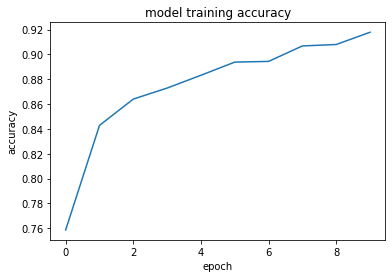

In [ ]:
# accessing the accuracy from the his variable
plt.plot(his.history['accuracy'])
# setting the title 
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

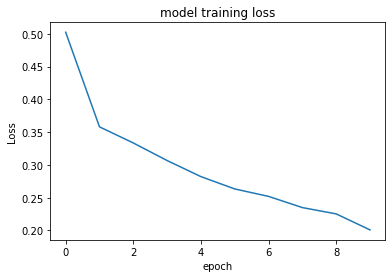

In [ ]:
# accessing the loss from the his variable
plt.plot(his.history['loss'])
# setting the title
plt.title('model training loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

**Observations:**
- We can observe from the above graphs that the accuracy is got improved from the 0.75 to 0.91 in 10 epochs.
- The training loss got reduced from the 0.50 to 0.20.

**Evaluating the model on the test data**

In [ ]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 15s 151ms/step - loss: 0.5624 - accuracy: 0.8017


[0.5623504519462585, 0.8016694784164429]

In [ ]:
ypred = model.predict(X_test)

94/94 [==============================] - 14s 149ms/step


In [ ]:
ypred

array([[0.822777  , 0.17722297],
       [0.34752357, 0.6524765 ],
       [0.17279705, 0.827203  ],
       ...,
       [0.19177353, 0.8082264 ],
       [0.99795794, 0.002042  ],
       [0.02011055, 0.97988945]], dtype=float32)

- The models is giving around 80% accuracy on the test data

In [ ]:
# saving the model
model.save("/content/drive/MyDrive/model.h5")

##**Conclusion**

- In terms of accuracy, LSTM outperforms models such as Vader and TextBlob. However, the result is nearly identical to that of TF-IDF.
- And, there is usually a trade-off between accuracy and computation.LSTM is good at remembering previous text sequences, and combining it with pretrained Word Embeddings like Word2Vec, GLoVe, and others can produce good sentiment analysis results.But training the model takes much longer than normal Supervised learning Algorithms like Random Forest using TF-IDF.
